In [1]:
from datetime import date

print(date.today())

2020-03-30


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import os 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(os.listdir("data/"))

['netflix-shows.zip']


In [3]:
dat = pd.read_csv('data/netflix-shows.zip')
dat.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [4]:
print(f"There are {dat.shape[0]} numbers of rows and {dat.shape[1]} numbers of features")

There are 6234 numbers of rows and 12 numbers of features


In [5]:
dat.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
# !pip install missingno

<Figure size 576x360 with 0 Axes>

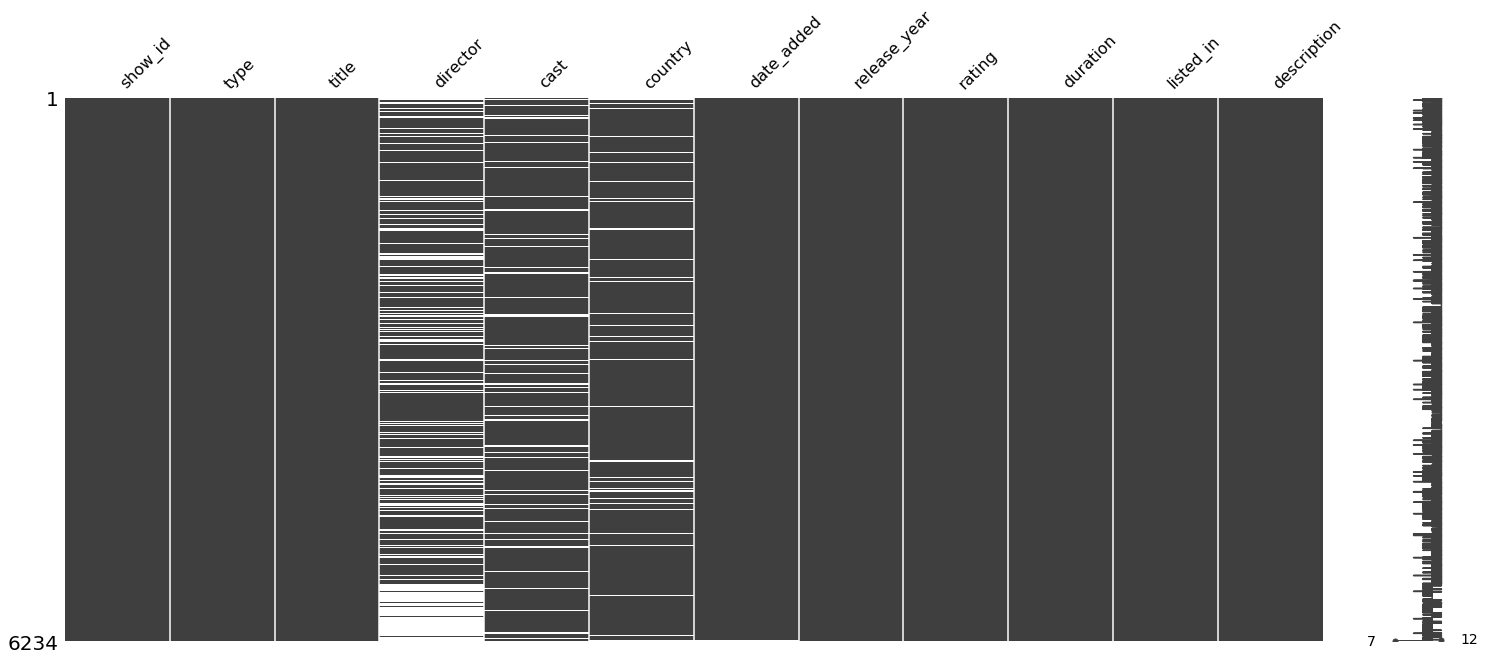

In [7]:
# there is a package that visualize the missing values, called missingno
import missingno as miss
fig = plt.figure(figsize= (8,5))
miss.matrix(dat)
plt.show()

In [8]:
for i in dat.columns:
    miss_rate = (dat[i].isna().sum() / dat.shape[0]) * 100
    if miss_rate > 0: 
        print(f"The missing rate of {i} is : {miss_rate} %")

The missing rate of director is : 31.584857234520374 %
The missing rate of cast is : 9.143407122232915 %
The missing rate of country is : 7.635547000320821 %
The missing rate of date_added is : 0.17645171639396856 %
The missing rate of rating is : 0.16041065126724416 %


In [9]:
dat.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6234.0,6234,6234,4265,5664,5758,6223,6234.0,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,Love,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3


In [10]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


In [11]:
# date_added should be in the date type! let's fix that first 
import datetime as dt
dat['date_added'] = pd.to_datetime(dat['date_added'])
dat['year_added'] = dat['date_added'].dt.year
dat['month_added'] = dat['date_added'].dt.month

dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 14 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null datetime64[ns]
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
year_added      6223 non-null float64
month_added     6223 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 681.9+ KB


In [12]:
dat.head() # there is in consistancy in duration: 90 mins vs. 1 season and such
# lets make new columns for season and keep it consistant for duration
dat['season'] = dat.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
dat['duration'] = dat.apply(lambda x: x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

dat.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019.0,9.0,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016.0,9.0,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",2018.0,9.0,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,2018.0,9.0,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017.0,9.0,


Let's see how the each content account for

Text(0.5, 1, 'Contents Ratio')

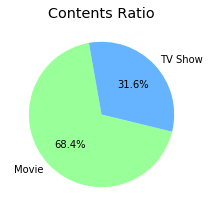

In [13]:
fig = plt.figure(figsize=(3,3))

labeles = dat['type'].value_counts().index.tolist()
sizes = dat['type'].value_counts().tolist()
colors = ['#99ff99','#66b3ff']
plt.pie(sizes, 
       labels=labeles, 
       colors= colors, 
       startangle= 100,
       autopct='%1.1f%%')

plt.tight_layout()

plt.title('Contents Ratio', 
          fontdict=None, 
          position = [0.5,1],
          size = 'x-large'
         )



Numb of Contents increases based on the events

In [14]:
# Preparing data for plot. Here, nan were filled with 0

year_data = dat['year_added'].value_counts().sort_index().fillna(0).loc[:2019]
type_data = dat.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

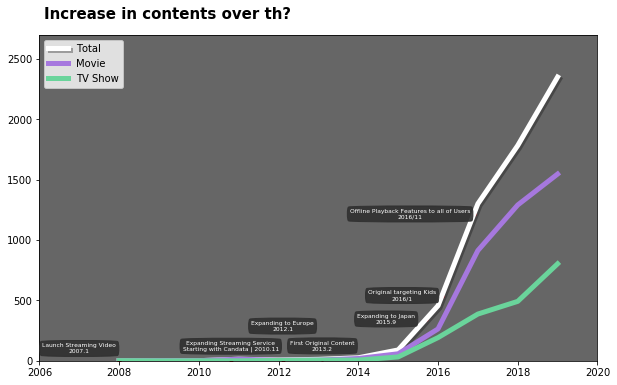

In [15]:
import matplotlib.patheffects as path_effects

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='#a678de', linewidth=5, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='#6ad49b', linewidth=5, label='TV Show')

ax.set_xlim(2006, 2020)
ax.set_ylim(0, 2700)

t = [2008,2010.8,2012.1,2013.1,2015.7,2016.1,2016.9]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100,110,280,110,0,0,0] # this sets up the position of box up/down

left_right = [-1,-0,-0,-0,-1,-1,-1.6] # this sets up the position of box left/right

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize= 6,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
# A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=10)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Increase in contents over th?", position=(0.23, 1.0+0.03), fontsize=15, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
plt.legend(loc='upper left', fontsize=10)


By the month

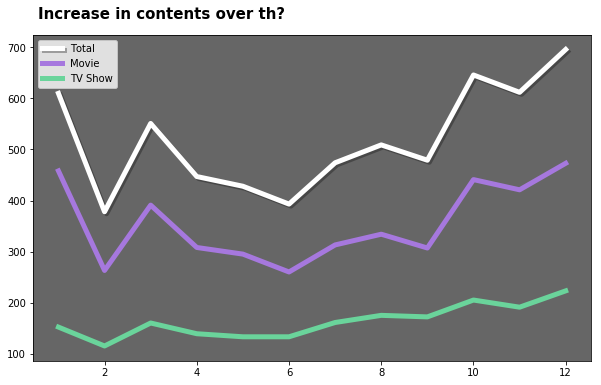

In [16]:
month_data = dat['month_added'].value_counts().sort_index().fillna(0)
type_data = dat.groupby('type')['month_added'].value_counts().sort_index().unstack().fillna(0).T

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.set_facecolor((0.4, 0.4, 0.4))
ax.plot(month_data.index, month_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='#a678de', linewidth=5, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='#6ad49b', linewidth=5, label='TV Show')
ax.set_title("Increase in contents over th?", position=(0.23, 1.0+0.03), fontsize=15, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)


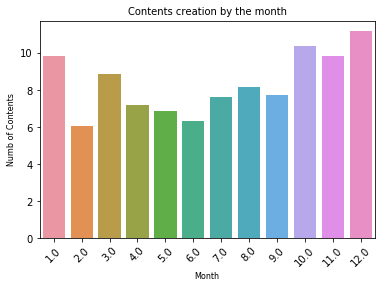

In [17]:
# now lets take a look at it by overall 

month_data = dat['month_added'].value_counts().reset_index()
month_data = month_data.rename(columns = {'month_added' :'count', 'index': 'month_added'})
month_data['perc'] = month_data['count'].apply(lambda x: x*100/ sum(month_data['count']))
month_data.sort_values('month_added')

sns.barplot(data=month_data, x='month_added', y= 'perc')
plt.title("Contents creation by the month", fontsize=10)
plt.xlabel("Month", fontsize=8)
plt.xticks(rotation=45)
plt.ylabel("Numb of Contents", fontsize=8)
plt.show()

Now, lets take a look at the number of contents by country 

In [18]:
country_data = dat['country'].value_counts()
# top 20 countries
country_data[:20]

United States                    2032
India                             777
United Kingdom                    348
Japan                             176
Canada                            141
South Korea                       136
Spain                             117
France                             90
Mexico                             83
Turkey                             79
Australia                          71
Taiwan                             69
Hong Kong                          51
Egypt                              50
Brazil                             50
United Kingdom, United States      50
China                              50
Thailand                           50
Indonesia                          44
Philippines                        44
Name: country, dtype: int64

In [29]:
con_dat = dat['country'].value_counts().reset_index(name= 'counts')
total = sum(con_dat['counts'])
top_20_total = sum(con_dat[:20]['counts'])
print(f'total : {total}')
print(f'top 20 countries : {top_20_total}')
print(f'percentage of contents that created by top 20 countries: {round(100 * top_20_total/total, 2)} %')

total : 5758
top 20 countries : 4508
percentage of contents that created by top 20 countries: 78.29 %


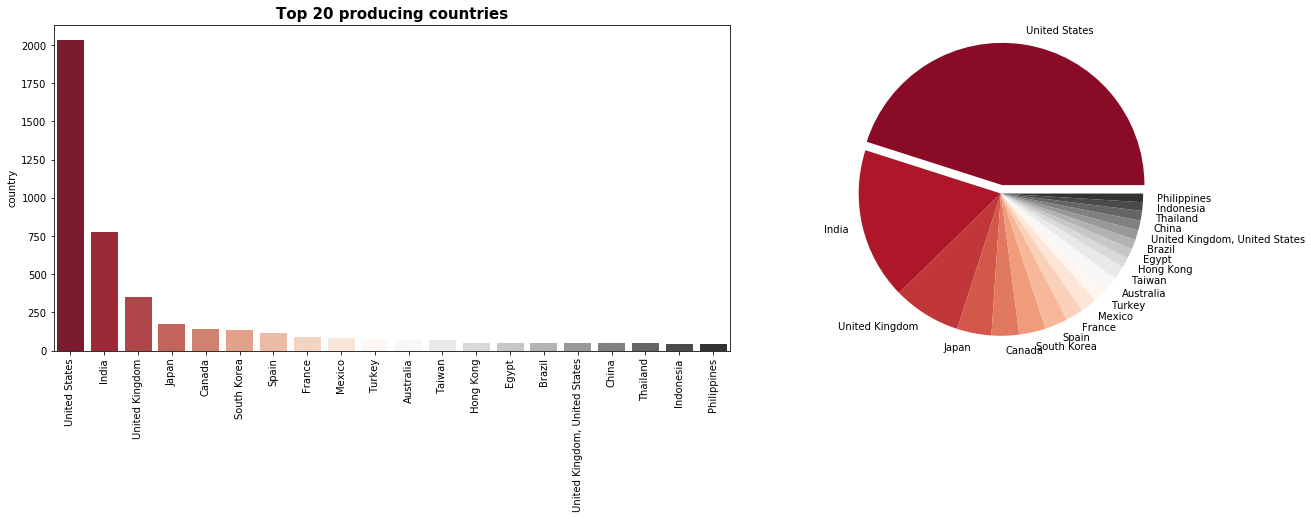

In [31]:
from matplotlib import gridspec
#fig, ax = plt.subplots(1,2, figsize = (14,5))

country_data = dat['country'].value_counts()

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])
explode = [0 for _ in range(20)]
explode[0] = 0.06

ax = plt.subplot(gs[0])
sns.barplot(country_data[:20].index, country_data[:20], ax=ax, palette="RdGy")
ax.set_xticklabels(country_data[:20].index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(country_data[:20], 
        labels=country_data[:20].index,
        startangle=0,
        explode= explode,
        colors=sns.color_palette("RdGy", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

In [ ]:
#!pip install plotly.express

In [52]:
import plotly.express as px
year_country = dat.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country = year_country.rename(columns = {'year_added':'year'})

fig = px.choropleth(year_country, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Yearly Comparison by Country')
fig.show()

By Genre

In [55]:
dat['genre'] = dat['listed_in'].apply(lambda x: x.replace(' ,',',').replace(', ',',').split(','))
#dat['genre']

types = []
for i in dat['genre']: 
    types += i
    
types = set(types)
print(f"There are {len(types)} types in the Netflix Dataset")   

There are 42 types in the Netflix Dataset


In [57]:
movies = dat[dat['type']=='Movie']
tvs = dat[dat['type'] == 'TV Show']

In [75]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
def genre_corr(dat, type):
    
    types = []
    for i in dat['genre']: types +=i
        
    types = set(types)
    print(f"There are {len(types)} types of the Netflix {type}")
    
    test = dat['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 10))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

There are 20 types of the Netflix Movies


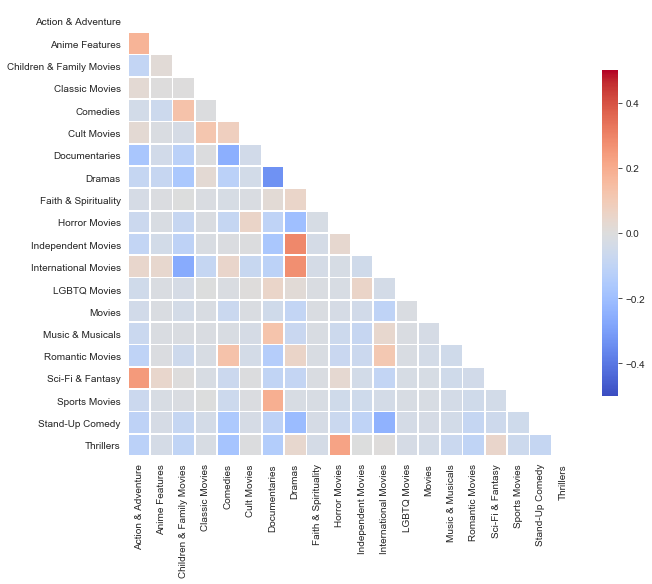

In [76]:
genre_corr(movies, 'Movies')

There are 22 types of the Netflix TV Shows


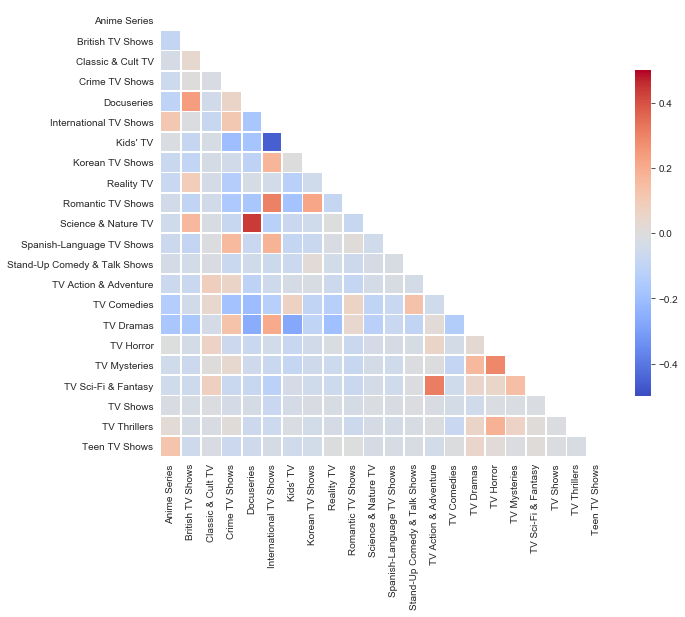

In [77]:
genre_corr(tvs, 'TV Shows')

By Ratings

In [78]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movies['rating'].value_counts()[rating_order]
tv_rating = tvs['rating'].value_counts()[rating_order].fillna(0)

In [100]:
def rating_barplot(dat, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(8, 5))
    if h_lim :
        ax.set_ylim(0, h_lim)
    
    ax.bar(dat.index, dat,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'purple',  'red']
    span_range = [[0, 2], [3, 6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=10, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

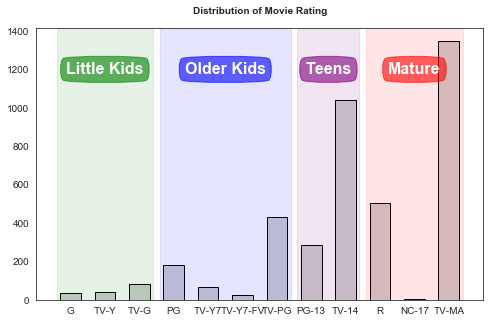

In [101]:
rating_barplot(movie_rating,'Movie', 1200)

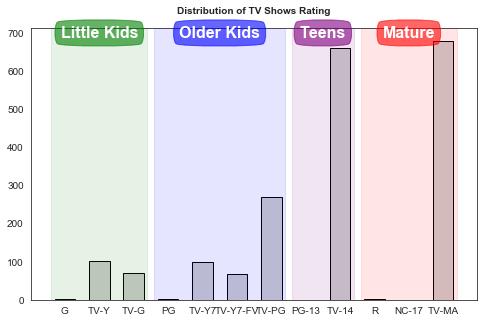

In [103]:
rating_barplot(tv_rating, "TV Shows", 700)